## Observations and Insights 

Observations/Inferences from this Data 
Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1)	The Box and Whisker plot for Infubinol has an outlier. When calculating the IQR and determining the values for potential outliers, we determined that the Tumor Values below 36.83290494999999 could be Infubinol outliers.  One mouse has a Tumor Volume (mm3) of 36.321345799999996.  This mouse is the outlier in the Infubinol data set.  From the same Box and Whisker plot for Infubinol, the Median Tumor Volume (mm3) is close to the 50th percentile.  Based on the Infubinol location of the middle of the hammers/whiskers, implies that the data is normally distributed.

2)	The Box and Whisker plot for Capomulin indicates that the median is close to the 75th percentile. The size of the box for Capomulin indicates that the interquartile range is smaller than Infubinol and Ceftamin.
  
3)	Ramicane appears to be slightly skewed to the left in the Box and Whisker Plot.

4)	Mouse l509 is on the Capomulin Regimen.  At time point 0 the Tumor Volume (mm3) was 45, eventually increasing to 48.07 (mm3).  By time point 35, the Tumor Volume (mm3) was down to 40.207.  However, by the final time point 45, the Tumor Volume (mm3) had increased to 41.483.   The data and Time Point graph indicate an initial increase and eventual decrease in Tumor Volume (mm3) before increasing at the last time point.  The jaggedness of increases followed by sharp decreases is indicative that further study and additional timepoints over time are needed before making definitive conclusions about the drugs impact.  
5)	The distribution of sex of the mice in this study is split almost evenly with 49% females and 51% males. A total of 248 mice were analyzed  

6)	The smallest mean Tumor Volume (mm3) across each drug regimen is Ramicane with 40.216745.  Capomulin treatment has the second smallest mean tumor volume at 40.675741.

7)	The number of mice across each treatment regimen varied.  More concerning is that the Timepoints varied between mice within and across treatment regimens.  Thus, the analysis and data may be skewed if mice in different drug regimens had more Timepoints.  It is important to determine the reason for mice having varying Timepoints. This could imply either varying lengths of time in the study or inconsistencies in the number of times measurements were taken.  Once again, an explanation is needed.


In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_research_df = pd.merge(mouse_metadata, study_results, how="left", on = 'Mouse ID')
# Display the data table for preview
merged_research_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#nunique() was selected because it retruns the the number of unique values. 
#Count() could not be used on the cobined dataset because after the merge we have multiple lines for each mouse.
#Count could be used on the mice metadata file but nunuique needs to be used on the merged data frame.
#Based on the instructions for the homework, there appears to be a duplicate mouse or mice in the data

count_of_mice = merged_research_df['Mouse ID'].nunique()
count_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# To determine the duplicated mice in the combined dataset, the duplicated() panda function will be used
#The output reflects the instances that are duplicated

duplicated_mice = merged_research_df[merged_research_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
merged_research_df[merged_research_df['Mouse ID'] == 'g989']



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Tried using:
#clean_merged_research_df=merged_research_df.drop_duplicates(['Mouse ID' , 'Timepoint'], False)
#clean_merged_research_df
#After attempting the use of drop_duplicates the count of the mice did not decrease

clean_merged_research_df = merged_research_df[merged_research_df['Mouse ID'] != 'g989']
clean_merged_research_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
count_of_mice_clean = clean_merged_research_df['Mouse ID'].nunique()
count_of_mice_clean

#The count of nunique mice dropped from 249 ro 248

248

In [7]:
clean_merged_research_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Calculated each statistic individually using the groupby on Drug Regiman to calculate the statistics of the Tumor Volume
#Calculation based on the clean_merged_research_df that removed the duplicated mouse data.

mean = clean_merged_research_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median = clean_merged_research_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
variance = clean_merged_research_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
standard_deviation = clean_merged_research_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem = clean_merged_research_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

#Create a summary statistis dataframe uimng the pd.DataFrame funtion. 
summary_statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem}).reset_index()
#added the reset index so that drug regimen would become a column and not the index
summary_statistics_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
clean_merged_research_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = clean_merged_research_df.groupby(['Drug Regimen']).agg(
    avg = ('Tumor Volume (mm3)','mean'),
    median = ('Tumor Volume (mm3)','median'),
    variance = ('Tumor Volume (mm3)','var'),
    standard_deviation = ('Tumor Volume (mm3)','std'),
    sem = ('Tumor Volume (mm3)','sem'),
    count = ('Mouse ID','count')
).reset_index()
                                                          
summary_statistics_agg 
                                                   

,Drug Regimen,avg,median,variance,standard_deviation,sem,count
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398,182


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Creare a new data frame using the clean data datafraem grouped by Drug Regimen and that also includes a count function
#Once created, a df will be created that only contains the the count of Mouse ID and Greg Regimen

drug_treatment_data = pd.DataFrame(clean_merged_research_df.groupby(['Drug Regimen']).count()).reset_index()
drug_treatment_data_df = drug_treatment_data[['Drug Regimen','Timepoint']]

drug_treatment_data_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0, 0.5, 'Number of Mice Tested')

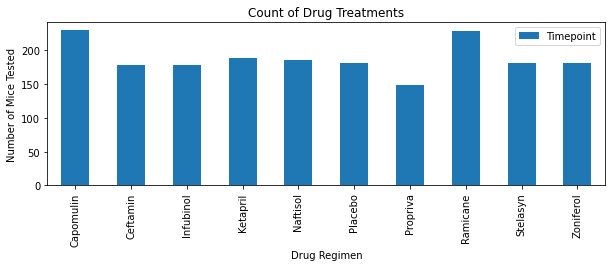

In [12]:
#Create the bar chart

drug_treatment_data_df.plot(x='Drug Regimen', y='Timepoint',kind="bar",figsize=(10,3),title='Count of Drug Treatments')
plt.ylabel("Number of Mice Tested")



In [13]:
drug_treatment_data_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


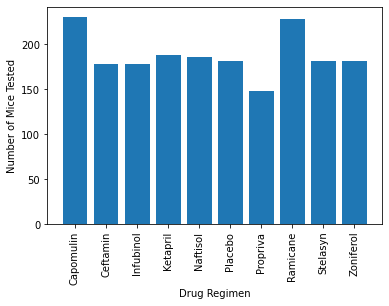

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Chart our data, give it a title, and label the axes
plt.bar(x=drug_treatment_data_df['Drug Regimen'],height=drug_treatment_data_df['Timepoint'])
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()



In [15]:
#Review of the clean merged research dataframe
clean_merged_research_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#First, let's groups by Sex and do a count
mice_gender_df = clean_merged_research_df.groupby(['Sex']).count().reset_index()
mice_gender_df



,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [17]:
#Drop the dataframe down to two columns - Sex and Mouse ID
#This becomes the clean and simple data frame I am going to use with the Pandas
mice_gender_df=mice_gender_df[['Sex','Mouse ID']]
mice_gender_df

,Sex,Mouse ID
0,Female,922
1,Male,958


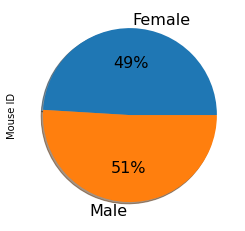

In [18]:
#Define the pie chart using Pandas

mice_gender_df.plot(kind='pie',y='Mouse ID',autopct= '%1.00f%%', shadow=True, 
                    labels=mice_gender_df["Sex"], legend=False, fontsize=16)


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Convert the dataframe down to a list
mice_sex_count= (clean_merged_research_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
mice_sex_count


[922, 958]

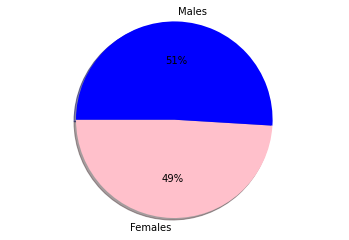

In [20]:
#Details of the pie chart
labels = ["Females","Males"]
colors = ["pink","blue"]
explode = (0.0, 0)

#Create the pie chart
plt.pie(mice_sex_count, labels=labels, colors=colors, explode=explode, autopct="%1.0f%%",shadow=True, startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Now that is getting much more complicated, I am going to break all of this down into smaller steps

#################Data Preparation########################
#Let's review current cleaned data data frame
#Note: Based on the approach I have taken, I don't have to merge with the final dataset to get the final tumor volumeat the last timepoint.

clean_merged_research_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
clean_merged_research_df.tail(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1843,y769,Ceftamin,Female,6,27,35,63.430632,3
1844,y769,Ceftamin,Female,6,27,40,64.251028,4
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1846,y865,Ceftamin,Male,23,26,0,45.000000,0
1847,y865,Ceftamin,Male,23,26,5,46.735006,1
1848,y865,Ceftamin,Male,23,26,10,49.522740,1
1849,y865,Ceftamin,Male,23,26,15,50.806519,1
1850,y865,Ceftamin,Male,23,26,20,52.361982,1
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3


In [23]:
##################################################################
#Maxiumum Time frame across entire set
#HOWEVER, instructions read 'Start by getting the last (greatest) timepoint for each mouse'

max_timepoint_mouse=clean_merged_research_df.groupby(['Mouse ID']).agg(
    Timepoint=('Timepoint','max')   
).reset_index()

max_timepoint_mouse

#Inner join to combine the last timepoint for each mouse with the matching data in the clean merged df
max_mouse=max_timepoint_mouse.merge(clean_merged_research_df, how='inner', on=['Mouse ID','Timepoint'])

max_mouse


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
###########################################################################
#Confirmed that the number of mice in study did not change after the inner join
count_of_mice_2 = max_mouse['Mouse ID'].nunique()
count_of_mice_2

248

In [25]:
#Next, I am going to creat a data frame for each of the drugs
#A data frame will be created for Capomulin, Ramicane, Infubinol, and Ceftamin
#naming convention will be first three characters of the drug, tp_max for max time point
cap_tp_max_df=max_mouse[max_mouse["Drug Regimen"].isin(["Capomulin"])].reset_index()
ram_tp_max_df=max_mouse[max_mouse["Drug Regimen"].isin(["Ramicane"])].reset_index()
inf_tp_max_df=max_mouse[max_mouse["Drug Regimen"].isin(["Infubinol"])].reset_index()
cef_tp_max_df=max_mouse[max_mouse["Drug Regimen"].isin(["Ceftamin"])].reset_index()


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   # Locate the rows which contain mice on each drug and get the tumor volumes
   # add subset 
   # Determine outliers using upper and lower bounds
    
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plot_dictionary = dict()

for drug in drugs:
    selected_drug_df=max_mouse[max_mouse["Drug Regimen"].isin([drug])].reset_index(drop=True)
    
    volumes = selected_drug_df['Tumor Volume (mm3)'].to_list()
    
    plot_dictionary[drug] = volumes
    
    quartiles = selected_drug_df.quantile([.25,.5,.75]).reset_index(drop=True)

    lowerq_cap = quartiles.iloc[0]['Tumor Volume (mm3)']
    upperq_cap = quartiles.iloc[2]['Tumor Volume (mm3)']
    medq_cap = quartiles.iloc[1]['Tumor Volume (mm3)']
    iqr_cap = upperq_cap - lowerq_cap
    
    print(f"The lower quartile of Tumor Volume (mm3) for {drug} is: {lowerq_cap}")
    print(f"The upper quartile of Tumor Volume (mm3) for {drug} is: {upperq_cap}")
    print(f"The interquartile range of Tumor Volume (mm3) for {drug} is: {iqr_cap}")
    print(f"The median range of Tumor Volume (mm3) for {drug} is: {medq_cap}")

    lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
    upper_bound_cap = upperq_cap + (1.5*iqr_cap)

    print(f"Values below {lower_bound_cap} could be {drug} outliers.")
    print(f"Values above {upper_bound_cap} could be {drug} outliers.")
    print(f"Volumes for {drug}: {sorted(volumes)}")
    print('')
    print('')
    
    
    

    

The lower quartile of Tumor Volume (mm3) for Capomulin is: 32.37735684
The upper quartile of Tumor Volume (mm3) for Capomulin is: 40.1592203
The interquartile range of Tumor Volume (mm3) for Capomulin is: 7.781863460000004
The median range of Tumor Volume (mm3) for Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
Volumes for Capomulin: [23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.125164399999996, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]


The lower quartile of Tumor Volume (mm3) for Ramicane is: 31.56046955
The upper quartile of Tumor Volume (mm3) for Ramicane is: 40.65900627
The interquartile range of Tumor Volume (mm3) for Ramicane is: 9.098536719999998
Th

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


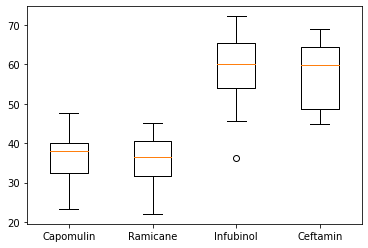

In [28]:
fig, ax = plt.subplots()
ax.boxplot(plot_dictionary.values())
ax.set_xticklabels(plot_dictionary.keys())
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509_df = clean_merged_research_df[clean_merged_research_df['Mouse ID']=='l509'].reset_index(drop=True)
#capomulin_drug_df=capomulin_drug_df[capomulin_drug_df["Drug Regimen"].isin(['Capomulin'])].reset_index(drop=True)
mouse_l509_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,l509,Capomulin,Male,17,21,0,45.000000,0
1,l509,Capomulin,Male,17,21,5,45.851193,0
2,l509,Capomulin,Male,17,21,10,46.759074,0
3,l509,Capomulin,Male,17,21,15,47.488599,1
4,l509,Capomulin,Male,17,21,20,48.070452,2
5,l509,Capomulin,Male,17,21,25,44.006257,2
6,l509,Capomulin,Male,17,21,30,44.708055,2
7,l509,Capomulin,Male,17,21,35,40.207289,2
8,l509,Capomulin,Male,17,21,40,40.770813,2
9,l509,Capomulin,Male,17,21,45,41.483008,3


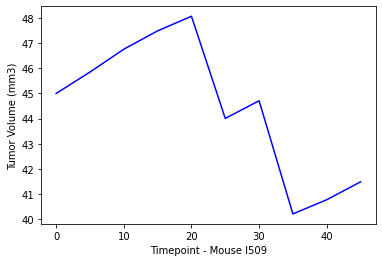

In [30]:
plt.plot(mouse_l509_df['Timepoint'], mouse_l509_df['Tumor Volume (mm3)'],linewidth=1.5, color ="blue")

plt.xlabel("Timepoint - Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

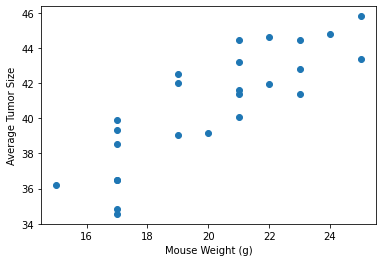

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Calculate average tumor volume for each mouse for each weight group
capomulin_drug_df=clean_merged_research_df[clean_merged_research_df["Drug Regimen"].isin(['Capomulin'])].reset_index(drop=True)
capomulin_drug_df_avg=capomulin_drug_df.groupby(["Mouse ID", "Weight (g)"]).agg(
    avg_tumor_size = ('Tumor Volume (mm3)', 'mean')
).reset_index()


plt.scatter(capomulin_drug_df_avg['Weight (g)'], capomulin_drug_df_avg['avg_tumor_size'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size")
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_drug_df_avg

,Mouse ID,Weight (g),avg_tumor_size
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


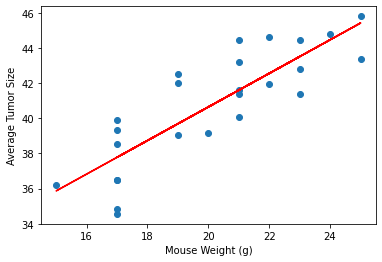

In [33]:
#import lineregress
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_drug_df_avg['Weight (g)'], capomulin_drug_df_avg['avg_tumor_size'])
regress_values = (capomulin_drug_df_avg['Weight (g)'] * slope + intercept)
plt.plot(capomulin_drug_df_avg['Weight (g)'], regress_values, "r-")
plt.scatter(capomulin_drug_df_avg['Weight (g)'], capomulin_drug_df_avg['avg_tumor_size'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size")
plt.show()